In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
 
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
 
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial
 
AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')

In [11]:
import glob

# Define the paths to the folders containing images
benign_folder = r'D:\venus\mlmodel\train_cancer\benign'
malignant_folder = r'D:\venus\mlmodel\train_cancer\malignant'

# Use glob to find all JPG files in each folder
try:
    benign_images = glob.glob(f'{benign_folder}/*.jpg')
    malignant_images = glob.glob(f'{malignant_folder}/*.jpg')

    # Combine the lists of images
    images = benign_images + malignant_images

    # Print the total number of images and their paths
    print(f"Total number of images: {len(all_images)}")
    for img_path in all_images:
        print(f"Image found: {img_path}")
except Exception as e:
    print(f"Error: {e}")


Total number of images: 270
Image found: D:\venus\mlmodel\train_cancer\benign\12.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\13.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\14.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\17.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\19.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\20.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\21.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\22.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\23.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\24.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\25.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\26.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\27.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\28.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\29.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\3.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\30.jpg
Imag

In [4]:
import os

base_directory = os.getcwd()
print(f"Base directory: {base_directory}")

Base directory: d:\venus\mlmodel


In [8]:
import os

# Create the folders if they don't exist
os.makedirs('benign_folder', exist_ok=True)
os.makedirs('malignant_folder', exist_ok=True)

In [13]:
try:
    benign_images = glob.glob(f'{'benign_folder'}/*.jpg')
    malignant_images = glob.glob(f'{'malignant_folder'}/*.jpg')

    print(f"Benign images: {benign_images}")
    print(f"Malignant images: {malignant_images}")

    images = benign_images + malignant_images
    print(f"Total number of images: {len(all_images)}")
except Exception as e:
    print(f"Error: {e}")


Benign images: ['benign_folder\\12.jpg', 'benign_folder\\13.jpg', 'benign_folder\\14.jpg', 'benign_folder\\17.jpg', 'benign_folder\\19.jpg', 'benign_folder\\20.jpg', 'benign_folder\\21.jpg', 'benign_folder\\22.jpg', 'benign_folder\\23.jpg', 'benign_folder\\24.jpg', 'benign_folder\\25.jpg', 'benign_folder\\26.jpg', 'benign_folder\\27.jpg', 'benign_folder\\28.jpg', 'benign_folder\\29.jpg', 'benign_folder\\3.jpg', 'benign_folder\\30.jpg', 'benign_folder\\32.jpg', 'benign_folder\\33.jpg', 'benign_folder\\34.jpg', 'benign_folder\\35.jpg', 'benign_folder\\36.jpg', 'benign_folder\\38.jpg', 'benign_folder\\39.jpg', 'benign_folder\\4.jpg', 'benign_folder\\40.jpg', 'benign_folder\\41.jpg', 'benign_folder\\42.jpg', 'benign_folder\\6.jpg', 'benign_folder\\7.jpg']
Malignant images: ['malignant_folder\\10.jpg', 'malignant_folder\\100.jpg', 'malignant_folder\\101.jpg', 'malignant_folder\\102.jpg', 'malignant_folder\\103.jpg', 'malignant_folder\\104.jpg', 'malignant_folder\\105.jpg', 'malignant_folder

In [14]:
import pandas as pd

# Clean up file paths
images = [path.replace('\\', '/') for path in images]

# Create a DataFrame
df = pd.DataFrame({'filepath': images})

# Extract the label from the correct part of the path (benign or malignant)
df['label'] = df['filepath'].apply(lambda x: x.split('/')[-2])

# Display the first few rows
df.head()


,filepath,label
0,benign_folder/12.jpg,benign_folder
1,benign_folder/13.jpg,benign_folder
2,benign_folder/14.jpg,benign_folder
3,benign_folder/17.jpg,benign_folder
4,benign_folder/19.jpg,benign_folder


In [15]:
df['label_bin'] = np.where(df['label'].values == 'malignant', 1, 0)
df.head()

,filepath,label,label_bin
0,benign_folder/12.jpg,benign_folder,0
1,benign_folder/13.jpg,benign_folder,0
2,benign_folder/14.jpg,benign_folder,0
3,benign_folder/17.jpg,benign_folder,0
4,benign_folder/19.jpg,benign_folder,0


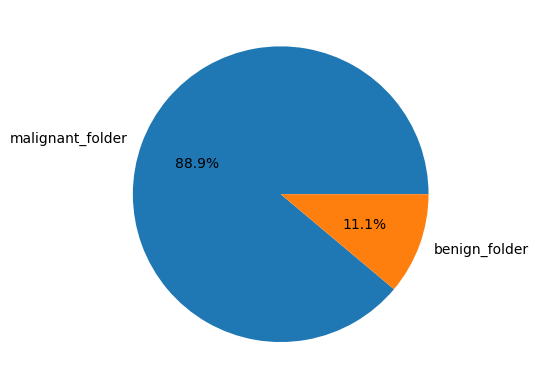

In [16]:
x = df['label'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

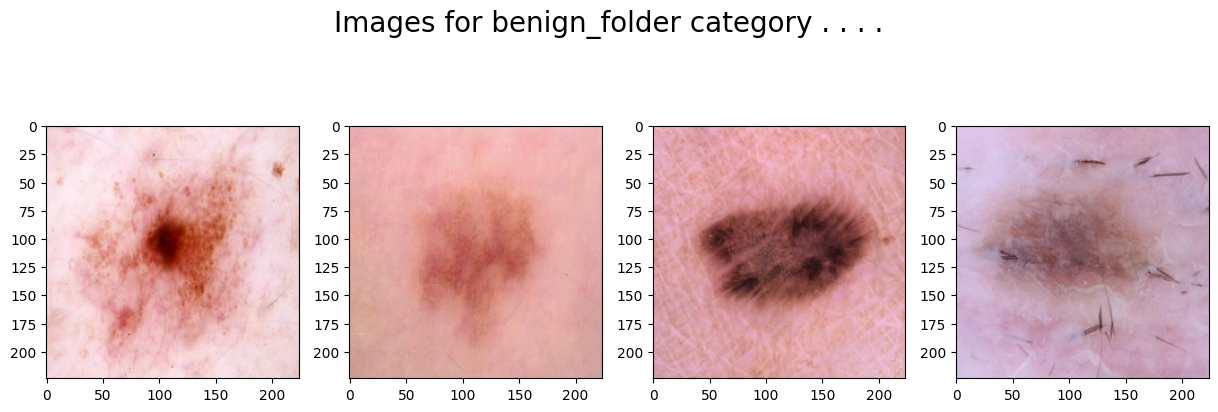

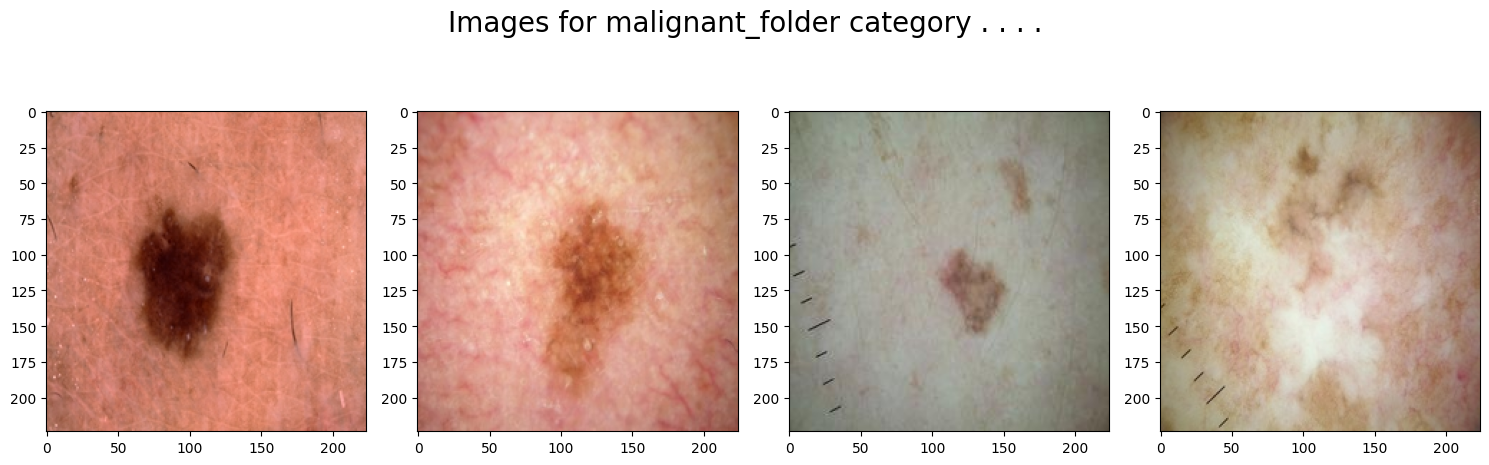

In [17]:
for cat in df['label'].unique():
    temp = df[df['label'] == cat]
 
    index_list = temp.index
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)
    for i in range(4):
        index = np.random.randint(0, len(index_list))
        index = index_list[index]
        data = df.iloc[index]
 
        image_path = data[0]
 
        img = np.array(Image.open(image_path))
        ax[i].imshow(img)
plt.tight_layout()
plt.show()

In [18]:
features = df['filepath']
target = df['label_bin']
 
X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.15,
                                      random_state=10)
 
X_train.shape, X_val.shape

((229,), (41,))

In [19]:
label_map = {'benign': 0, 'malignant': 1}
df['label'] = df['label'].map(label_map)

In [20]:
def decode_image(filepath, label):
    # Read and decode the image
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize to the desired size
    
    # Normalize the image to [0, 1] range
    image = image / 255.0
    
    return image, label

In [21]:
train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)
 
val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

In [22]:
X_train = df['filepath'].values
Y_train = df['label'].values

train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .map(decode_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

# If you have validation data, do the same for X_val and Y_val
val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .map(decode_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)


In [23]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
 
pre_trained_model = EfficientNetB7(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)
 
for layer in pre_trained_model.layers:
    layer.trainable = False

In [24]:
from tensorflow.keras import Model
 
inputs = layers.Input(shape=(224, 224, 3))
x = layers.Flatten()(inputs)
 
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
 
model = Model(inputs, outputs)

In [25]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC']
)

In [26]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5,
                    verbose=1)

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - AUC: 0.0000e+00 - loss: nan - val_AUC: 0.0000e+00 - val_loss: nan
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - AUC: 0.0000e+00 - loss: nan - val_AUC: 0.0000e+00 - val_loss: nan
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - AUC: 0.0000e+00 - loss: nan - val_AUC: 0.0000e+00 - val_loss: nan
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - AUC: 0.0000e+00 - loss: nan - val_AUC: 0.0000e+00 - val_loss: nan
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - AUC: 0.0000e+00 - loss: nan - val_AUC: 0.0000e+00 - val_loss: nan


In [27]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,AUC,loss,val_AUC,val_loss
0,0.0,NaN,0.0,NaN
1,0.0,NaN,0.0,NaN
2,0.0,NaN,0.0,NaN
3,0.0,NaN,0.0,NaN
4,0.0,NaN,0.0,NaN


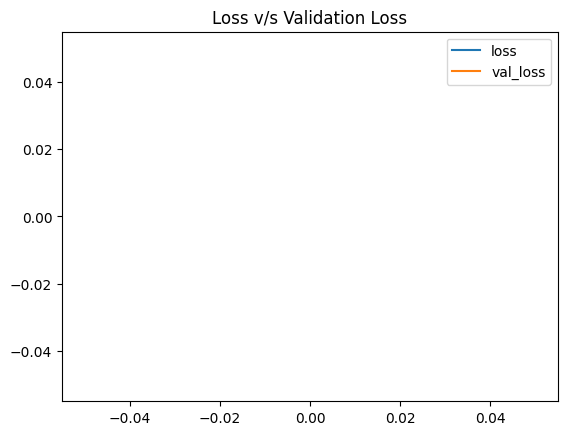

In [28]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()